<DIV ALIGN=CENTER>

# Introduction to Text Analysis
## Professor Robert J. Brunner
  
</DIV>  
-----
-----


## Introduction

In this IPython Notebook, we introduce text analysis.

1. fetch news group
2. explore data
3. one article.
4. tokenize with python
5. count.
6. parse, header/footer
7. lower case
8. remove odd things
9. Counts
10. Bag of Words.
11. NLTK.

-----

In [1]:
% matplotlib inline

### Data

To get started with text analysis, we need **texts to analyze**. To get
started, we will analyze the [twenty newsgroup][tng] data set. We first
download this data (scikit learn has built in methods for doing this,
however, we have cached a copy locally on our server). The data are made
available via a custom object, but we can access the data of interest by
using dictionary keys. Before delving into text analysis, we first
explore this data over several code cells to understand more about the
task at hand.

-----

[tng]: http://kdd.ics.uci.edu/databases/20newsgroups/20newsgroups.data.html

In [2]:
# load dataset
from sklearn.datasets import fetch_20newsgroups

text = fetch_20newsgroups(data_home='/home/data_scientist/data/textdm')

# To learn more about these data, either browse the relevant 
# scikit learn documentation, or enter help(text) in an IPython code cell

# The data can be accessed via Dictionary keys

print(text.keys())

dict_keys(['target_names', 'target', 'DESCR', 'filenames', 'data'])


In [3]:
# Display target names, i.e., the names of the twenty news groups

for idx, label in enumerate(text['target_names']):
    print('Class {0:2d} = {1}'.format(idx, label))

Class  0 = alt.atheism
Class  1 = comp.graphics
Class  2 = comp.os.ms-windows.misc
Class  3 = comp.sys.ibm.pc.hardware
Class  4 = comp.sys.mac.hardware
Class  5 = comp.windows.x
Class  6 = misc.forsale
Class  7 = rec.autos
Class  8 = rec.motorcycles
Class  9 = rec.sport.baseball
Class 10 = rec.sport.hockey
Class 11 = sci.crypt
Class 12 = sci.electronics
Class 13 = sci.med
Class 14 = sci.space
Class 15 = soc.religion.christian
Class 16 = talk.politics.guns
Class 17 = talk.politics.mideast
Class 18 = talk.politics.misc
Class 19 = talk.religion.misc


In [4]:
# Display single message
messageID = 250

print('Target Newsgroup: {0}'.format(text['target_names'][text['target'][messageID]]))
print(70*'-')

message = text['data'][messageID]
print(message)

Target Newsgroup: comp.sys.ibm.pc.hardware
----------------------------------------------------------------------
From: rnichols@cbnewsg.cb.att.com (robert.k.nichols)
Subject: Re: how to search for bad memory chips.
Organization: AT&T
Distribution: na
Lines: 29

In article <N5s42B8w165w@c-cat.UUCP> david@c-cat.UUCP (Dave) writes:
>i came upon this idea i would like to share with everyone.
>
>to check for bad memory chips
>
>1. create a boot disk with emm386 himem.sys and ramdrive.sys in the
>   config/autoexec.bat.
>
>2. boot the PC to create a RAM drive as large as possible.
>
>3. use a disk repair utility ( I use NDD ). Run it on the RAM
>        drive, yes it will run, its only a device driver
>
>4. run 1000 or so passes, they go very quick
>
>5. if your machine fails, there is a definate bad memory chip
>
>6. if your machine passes, there is a conflict with programs you
>        are loading in memory.
...

It's an interesting idea, but the worst-case data patterns developed to
test

In [5]:
print('Expression Count: {0}'.format(message.count('the')))
print('Isolated Token Count: {0}'.format(message.count(' the ')))

Expression Count: 8
Isolated Token Count: 4


In [6]:
import collections as cl
import pprint
pp = pprint.PrettyPrinter(indent=2, depth=2, width=80, compact=True)

words = message.split()
wc = cl.Counter(words)

# Number of tokens to display from message
wc_display = 40

pp.pprint(wc.most_common(wc_display))

[ ('>', 10), ('a', 6), ('the', 5), ('to', 5), ('memory', 4), ('with', 3),
  ('bad', 3), ('in', 3), ('create', 2), ('is', 2), ('passes,', 2), ('disk', 2),
  ('if', 2), ('as', 2), ('chips.', 2), ('it', 2), ('patterns', 2), ('use', 2),
  ('for', 2), ('AT&T', 2), ('RAM', 2), ('are', 2), ('your', 2), ('boot', 2),
  ('machine', 2), ('there', 2), ('everyone.', 1), ('NDD', 1), ('Re:', 1),
  ('drive', 1), ('>i', 1), ('check', 1), ('on', 1), ('...', 1), ('drive,', 1),
  ('test', 1), ('large', 1), ('common', 1), ('different', 1), ('device', 1)]


In [7]:
import re

pattern = re.compile(r'[^\w\s]')
  
words = re.sub(pattern, ' ', message).split()
wc = cl.Counter(words)

pp.pprint(wc.most_common(wc_display))

[ ('a', 6), ('to', 6), ('the', 5), ('memory', 5), ('with', 3), ('chips', 3),
  ('in', 3), ('bad', 3), ('drive', 2), ('create', 2), ('is', 2), ('if', 2),
  ('as', 2), ('it', 2), ('i', 2), ('UUCP', 2), ('c', 2), ('use', 2), ('cat', 2),
  ('patterns', 2), ('rnichols', 2), ('for', 2), ('RAM', 2), ('are', 2),
  ('AT', 2), ('your', 2), ('com', 2), ('run', 2), ('idea', 2), ('boot', 2),
  ('sys', 2), ('disk', 2), ('machine', 2), ('T', 2), ('there', 2), ('att', 2),
  ('passes', 2), ('david', 1), ('Organization', 1), ('check', 1)]


In [8]:
words = re.sub(pattern, ' ', message.lower()).split()

wc = cl.Counter(words)

pp.pprint(wc.most_common(wc_display))

[ ('to', 6), ('a', 6), ('the', 5), ('memory', 5), ('in', 4), ('with', 3),
  ('chips', 3), ('it', 3), ('i', 3), ('bad', 3), ('run', 3), ('at', 2),
  ('drive', 2), ('create', 2), ('nichols', 2), ('is', 2), ('if', 2), ('as', 2),
  ('patterns', 2), ('c', 2), ('t', 2), ('for', 2), ('use', 2), ('cat', 2),
  ('rnichols', 2), ('are', 2), ('uucp', 2), ('ram', 2), ('your', 2), ('com', 2),
  ('idea', 2), ('boot', 2), ('sys', 2), ('disk', 2), ('machine', 2),
  ('there', 2), ('att', 2), ('passes', 2), ('david', 1), ('check', 1)]


In [9]:
print('{0:12s}: {1}'.format('Term', 'Frequency'))
print(25*'-')

t_wc = sum(wc.values())
for wt in wc.most_common(10):
    print('{0:12s}: {1:4.3f}'.format(wt[0], wt[1]/t_wc))

Term        : Frequency
-------------------------
to          : 0.032
a           : 0.032
the         : 0.027
memory      : 0.027
in          : 0.021
with        : 0.016
chips       : 0.016
it          : 0.016
i           : 0.016
bad         : 0.016


-----

## Student Activity

In the preceding cells, we used XXX. Now that you
have run the Notebook, go back and make the following changes to see how
the results change.

1. Change 
2. Change 
3. Try making 

Finally, try applying 

-----

-----
### Bag of Words

A simple question about text data mining that you might have is _How
does one classify documents made up of words when machine learning
algorithms work on numerical data?_ The simple answer is we need to
build a numerical summary of a data set that our algorithms can
manipulate. A conceptually easy approach  to implement this idea is to
identify all possible words in the documents of interest and to track the
number of times each words occurs in specific documents. This produces a
(very) sparse matrix for our sample of documents, where the columns are
the possible words (or tokens) and the rows are different documents. 

This concept, where one tokenizes documents to build these sparse
matrices is more formally known as _bag of words_, because we effectively
create the [bag of words][bwd] out of which are documents are
constructed. In the bag of words model, each document can be mapped into
a vector, where the individual elements correspond to the number of
times the words (associated with the particular column) appears in the
document.

With scikit learn, we can use the [`CountVectorizer`][skcv] to break our
document into tokens (in this case words), which are used to construct
our _bag of words_ for the given set of documents. Given this tokenizer,
we first need to construct the list of tokens, which we do with the
`fit` method. Second, we need to transform our documents into this
sparse matrix, which we do with the `transform` method. Since both steps
use the same input dta, there is a convenience method to perform both
operations at the same time, called `fit_transform`.

-----
[bwd]: https://en.wikipedia.org/wiki/Bag-of-words_model
[skcv]: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word', lowercase=True)

-----

Given the `CountVectorizer` we can see the number of words in our _bag_
as well as the number of documents on which we train, which in this case
agrees with the values we obtained when we read in the data.

-----

In [11]:
cv.fit(text['data'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [12]:
# We needd an iteratable to appply cv.transform()
msg = []
msg.append(message)

dtm = cv.transform(msg)

print('Number of Samples = {0}'.format(dtm.shape[0]))
print('Number of Tokens = {0}'.format(dtm.shape[1]))
print(75*'-')

# We can convert from sparse to dense to explore the document-term matrix
print(dtm.todense()[:,45141:45240])
print(75*'-')

# We can also find the 
import scipy.sparse as sp

print('Tuples from Document-Term Matrix[i, j] and c (Count)')
print(75*'-')

i, j, c = sp.find(dtm)
dtm_list = list(zip(i, j, c))
pp.pprint(dtm_list)

Number of Samples = 1
Number of Tokens = 130107
---------------------------------------------------------------------------
[[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
---------------------------------------------------------------------------
Tuples from Document-Term Matrix[i, j] and c (Count)
---------------------------------------------------------------------------
[ (0, 2338, 1), (0, 10368, 1), (0, 28012, 1), (0, 28146, 1), (0, 29241, 2),
  (0, 29573, 1), (0, 29620, 2), (0, 30044, 2), (0, 30193, 2), (0, 30526, 1),
  (0, 31495, 3), (0, 32036, 1), (0, 32669, 1), (0, 34128, 1), (0, 34404, 2),
  (0, 35805, 1), (0, 37509, 1), (0, 38019, 1), (0, 38082, 2), (0, 38243, 1),
  (0, 38314, 1), (0, 39169, 1), (0, 39415, 1), (0, 39426, 3), (0, 41105, 2),
  (0, 41288, 1), (0, 41850, 1), (0, 41880, 1), (0, 43311, 2), (0, 45143, 1),
  (0

-----

We can grab the words in our _bag of words_ by extracting the _vocubulary_. This allows us to see if words are present in the documents.

-----

In [13]:
terms = cv.vocabulary_

my_word = 'the'
print("Arbitrary Word = {0}: Column = {1}".format(my_word, terms[my_word]))

from operator import itemgetter
max_key = max(dtm_list, key=itemgetter(2))[1]
min_key = min(dtm_list, key=itemgetter(2))[1]

x_max = [key for key in terms.keys() if terms[key] == max_key]
x_min = [key for key in terms.keys() if terms[key] == min_key]

print("Max Word = {0} : Column = {1}".format(x_max[0], max_key))
print("Min Word = {0} : Column = {1}".format(x_min[0], min_key))

Arbitrary Word = the: Column = 114455
Max Word = to : Column = 115475
Min Word = 1000 : Column = 2338


In [14]:
# Number of terms to display
top_display = 10

# Sort our document term list, and unzip
dtm_list.sort(key=itemgetter(2), reverse=True)
i, j, c = zip(*dtm_list)

# Grab out the keys and values for top terms
x_keys = [(k, v) for k, v in terms.items() if terms[k] in j[:top_display]]
x_keys.sort(key=itemgetter(1), reverse=True)

# Grab the data, including counts from DTM list
x_counts = dtm_list[:top_display]
x_counts.sort(key=itemgetter(1), reverse=True)

# Now we merge the two lists so we can sort to display terms in order
x_merged = []
for idx in range(len(x_keys)):
    if x_keys[idx][1] != x_counts[idx][1]:
        print('Error: column mismatch!')

    x_merged.append((x_keys[idx][0], x_keys[idx][1], x_counts[idx][2]))

x_merged.sort(key=itemgetter(2), reverse=True)

# Print results
for x in x_merged:
    print("Count = {2}: terms[{0}] = {1}".format(x[1], x[0], x[2]))

Count = 6: terms[115475] = to
Count = 5: terms[114455] = the
Count = 5: terms[81066] = memory
Count = 4: terms[66608] = in
Count = 3: terms[124616] = with
Count = 3: terms[103506] = run
Count = 3: terms[68766] = it
Count = 3: terms[39426] = chips
Count = 3: terms[31495] = bad
Count = 2: terms[29241] = are


-----

## Student Activity

In the preceding cells, we used scikit learn to ....

Note how we do not have the single charctaer word `a` in the list of most common items. The reason is the default tokenizer for `CountVectorizer` removes single character words (as they are assumed to be uninformative). You can fix this by assigning the string `'(?u)\\b\\w+\\b'` as a value to the `token_pattern` parameter when creating the `CountVectorizer`.


Rerun with this change and verify that the `a` token now appears.

PCA to transform the combined digit data
and to explore the distribution of the real data and outliers in
two-dimensional plots by using different PCA components. Now that you
have run the Notebook, go back and make the following changes to see how
the results change.

1. Change the number of PCA components lower and higher. How does this
affect the separation of the outliers?
2. Change the PCA components used to make these plots, for example
to the third and fourth component. How does this affect the separation
of the outliers?
3. Try making a new fake data point that combines the 'bar' image from
the helper code with an existing number, such as a six. Using a
different color ini the plots for this data point, where does this new,
more realistic _fake_ data point lie in the previous plots?

Finally, try applying a classifier on the new digit data. Can you
explain (feel free to use the class forums) why the classification
algorithm performed in the  manner it did for the new _fake_ digits?

-----

## NLTK

-----


In [15]:
import nltk

In [16]:
words = [word.lower() for word in nltk.word_tokenize(message)]
counts = nltk.FreqDist(words)
pp.pprint(counts.most_common(top_display))

[ ('>', 19), ('.', 13), (':', 7), ('to', 6), (',', 6), ('a', 6), ('the', 5),
  ('memory', 5), ('@', 4), ('in', 4)]


In [17]:
words = [word.lower() for word in nltk.word_tokenize(re.sub(pattern, ' ', message))]
counts = nltk.FreqDist(words)
pp.pprint(counts.most_common(top_display))

[ ('to', 6), ('a', 6), ('the', 5), ('memory', 5), ('in', 4), ('with', 3),
  ('chips', 3), ('it', 3), ('i', 3), ('bad', 3)]


In [18]:
# https://en.wikipedia.org/wiki/Lexical_diversity

num_words = len(words)
num_tokens = len(counts)
lexdiv  =  num_words / num_tokens
print("Message has %i tokens and %i words for a lexical diversity of %0.3f" % (num_tokens, num_words, lexdiv))

Message has 128 tokens and 188 words for a lexical diversity of 1.469


In [19]:
# Display number of unique tokens (or bins)
print('Number of unique bins(tokens) = {0}\n'.format(counts.B()))
print('Number of sample outcomes = {0}\n'.format(counts.N()))
print('Maximum occuring token = {0}\n'.format(counts.max()))

tokens = [(word, counts.freq(word)) for word in words]
tokens.sort(key=itemgetter(1), reverse=True)

for token, freq in tokens[:top_display]:
    print('{0:12s} has frequency {1:4.3f}'.format(token, freq))


Number of unique bins(tokens) = 128

Number of sample outcomes = 188

Maximum occuring token = to

to           has frequency 0.032
to           has frequency 0.032
to           has frequency 0.032
a            has frequency 0.032
to           has frequency 0.032
a            has frequency 0.032
a            has frequency 0.032
a            has frequency 0.032
a            has frequency 0.032
a            has frequency 0.032


In [20]:
# Hapaxes: https://en.wikipedia.org/wiki/Hapax_legomenon
pp.pprint(counts.hapaxes()[:10])

[ 'david', 'check', 'on', 'test', 'subject', 'common', 'cbnewsg', 'but', 'cb',
  'bat']


In [21]:
counts.tabulate(top_display)

  to    a  the memory   in with chips   it    i  bad 
   6    6    5    5    4    3    3    3    3    3 


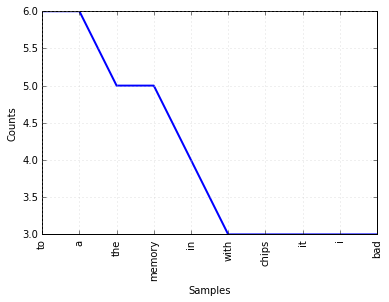

In [22]:
counts.plot(top_display, cumulative=False)

-----
## NLTK Corpus

-----

In [23]:
# Access an NLTK data set. 
#Reuter articles

mvr = nltk.corpus.movie_reviews

In [24]:
# Print the data set README,  remove array bounds to see entire file
print(mvr.readme()[:178])

Sentiment Polarity Dataset Version 2.0
Bo Pang and Lillian Lee

http://www.cs.cornell.edu/people/pabo/movie-review-data/

Distributed with NLTK with permission from the authors.



In [25]:
mvr_words = mvr.words()
counts  = nltk.FreqDist(mvr_words)
num_words = len(mvr_words)
num_tokens = len(counts)
lexdiv  =  num_words / num_tokens
print("Movie Review has {0} tokens and {1} words for a lexical diversity of {2:4.3f}".format(num_tokens, num_words, lexdiv))

Movie Review has 39768 tokens and 1583820 words for a lexical diversity of 39.826


In [26]:
pp.pprint(mvr.words()[:50])

[ 'plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party',
  ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an',
  'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his',
  'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',',
  'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?',
  'watch']


In [27]:
# Each article is in a separate file

print('Total Number of reviews = {0}'.format(len(mvr.fileids())))

Total Number of reviews = 2000


In [28]:
a_filename = mvr.fileids()[0]
print('Example File: {0}'.format(a_filename))

Example File: neg/cv000_29416.txt


In [29]:
# Print part of the file
pp.pprint(mvr.raw(a_filename)[:211])

('plot : two teen couples go to a church party , drink and then drive . \n'
 'they get into an accident . \n'
 'one of the guys dies , but his girlfriend continues to see him in her life '
 ', and has nightmares . \n'
 "what's the d")


In [30]:
# Display article assigned categories
pp.pprint(mvr.categories())

['neg', 'pos']


In [31]:
# Find articles that have specific category
pp.pprint(mvr.fileids('neg')[:20])

[ 'neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt',
  'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt',
  'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt',
  'neg/cv009_29417.txt', 'neg/cv010_29063.txt', 'neg/cv011_13044.txt',
  'neg/cv012_29411.txt', 'neg/cv013_10494.txt', 'neg/cv014_15600.txt',
  'neg/cv015_29356.txt', 'neg/cv016_4348.txt', 'neg/cv017_23487.txt',
  'neg/cv018_21672.txt', 'neg/cv019_16117.txt']


In [32]:
# Display sentances from an article

a_filename = 'neg/cv779_18989.txt'
for sent in mvr.sents(a_filename):
    pp.pprint(sent)

[ '9', ':', 'its', 'pathetic', 'attempt', 'at', '"', 'improving', '"', 'on',
  'a', 'shakespeare', 'classic', '.']
['8', ':', 'its', 'just', 'another', 'piece', 'of', 'teen', 'fluff', '.']
['7', ':', 'kids', 'in', 'high', 'school', 'are', 'not', 'that', 'witty', '.']
['6', ':', 'the', 'wittiness', 'is', 'not', 'witty', 'enough', '.']
['5', ':', 'the', 'comedy', 'is', 'not', 'funny', '.']
['4', ':', 'the', 'acting', 'is', 'poor', '.']
['3', ':', 'the', 'music', '.']
['2', ':', 'the', 'poster', '.']
['1', ':', 'its', 'worse', 'than', 'she', "'", 's', 'all', 'that', '!']
[ '10', '=', 'a', 'classic', '9', '=', 'borderline', 'classic', '8', '=',
  'excellent', '7', '=', 'good', '6', '=', 'better', 'than', 'average', '5',
  '=', 'average', '4', '=', 'disappointing', '3', '=', 'poor', '2', '=',
  'awful', '1', '=', 'a', 'crap', 'classic']


In [33]:
# We can process the words with normal Python
# For example, print out really long words
long_words = [word for word in mvr_words if len(word) > 22]
long_words.sort(reverse=True)
pp.pprint(long_words)

[ 'uuuuuuggggggglllllllyyyyy', 's_funniest_home_videos_',
  '_the_last_days_of_disco_', '_i_know_what_you_did_last_summer_',
  '_fear_and_loathing_in_las_vegas_', '_breakfast_of_champions_',
  '_breakfast_of_champions_', '_a_night_at_the_roxbury_',
  '_a_night_at_the_roxbury_',
  '__________________________________________________________',
  '____________________________________________', '==========================',
  '========================', '=======================',
  '--------------------------------------------------------------',
  '--------------------------------------------------------------',
  '--------------------------------------------------------------',
  '--------------------------------------------------------------',
  '--------------------------------------------------------------',
  '--------------------------------------------------------------']


-----

## Student Activity

In the preceding cells, we used NLTK to ....

Now that you
have run the Notebook, go back and make the following changes to see how
the results change.

1. Change the 
2. Change the 
3. Try making 



-----